In [1]:
%load_ext autoreload
%autoreload 2

In [49]:
import pandas as pd
import seaborn as sns
import numpy as np
import sidekick
from IPython.display import display

In [74]:
df = pd.read_csv(
    "https://storage.googleapis.com/bucket-8732/datalibrary/forecast_sales.csv"
)

# Corrupt the dataset
df.loc[[0, 5, 100], "Year"] = np.NaN
df.loc[[0, 1, 2], "Day"] = np.NaN

# Remove duplicate rows
df = sidekick.drop_duplicates(df)

table = df.copy()

In [75]:
## Inspect what the data contains

In [76]:
table.head()

,Date,Year,Week,Day,Store Name,Location,Store Type,Advertising Level,Special Promotion,Holiday,Open,Revenue
0,2016-01-01,NaN,1,NaN,Mammoth,Stockholm,Family,Low,No,Yes,No,304.40
1,2016-01-01,2016.0,1,NaN,Cuckoo,Stockholm,Standard,Low,No,Yes,No,0.00
2,2016-01-01,2016.0,1,NaN,Eel,Göteborg,Family,Medium,No,Yes,Yes,335.84
3,2016-01-01,2016.0,1,Friday,Goose,Göteborg,Select,Low,No,Yes,No,0.00
4,2016-01-01,2016.0,1,Friday,Alligator,Göteborg,Family,Medium,No,Yes,Yes,230.06


In [77]:
# Here we see statistics about or features. 
# Notice that only the numerical ones have such statistics
table.describe()

,Year,Week,Revenue
count,99345.000000,99348.000000,99348.000000
mean,2017.499019,26.875428,122.806238
std,1.118332,15.067466,67.435750
min,2016.000000,1.000000,0.000000
25%,2016.000000,14.000000,79.820000
50%,2017.000000,27.000000,114.320000
75%,2018.000000,40.000000,158.310000
max,2019.000000,53.000000,577.520000


In [78]:
table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99348 entries, 0 to 99347
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               99348 non-null  object 
 1   Year               99345 non-null  float64
 2   Week               99348 non-null  int64  
 3   Day                99345 non-null  object 
 4   Store Name         99348 non-null  object 
 5   Location           99348 non-null  object 
 6   Store Type         99348 non-null  object 
 7   Advertising Level  99348 non-null  object 
 8   Special Promotion  99348 non-null  object 
 9   Holiday            99348 non-null  object 
 10  Open               99348 non-null  object 
 11  Revenue            99348 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 9.9+ MB


In [79]:
sidekick.show_missing(table)

,Not Missing,Total Missing,% Missing
Advertising Level,48203,51145,51.480654
Year,99342,3,0.003020
Day,99342,3,0.003020
Date,99348,0,0.000000
Week,99348,0,0.000000
Store Name,99348,0,0.000000
Location,99348,0,0.000000
Store Type,99348,0,0.000000
Special Promotion,99348,0,0.000000
Holiday,99348,0,0.000000


In [80]:
## Change type

In [81]:
# TODO
table["Year"].astype('int')
table.info()

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

## Drop Missing values

- either replace missing values based on some condition
- or remove all missing values

In [ ]:
# Imputation uses `method='auto'` as default
sidekick.impute_values(table, columns=table.columns, target="Revenue")

In [ ]:
#table = sidekick.impute(df, columns=["Year", "Day", "Advertising Level"], method="replace", value=4)
table = sidekick.impute_values(table, columns=["Year", "Day"], target="Revenue", method="mode")
table

In [82]:
# Here we drop all missing values right away
table = sidekick.drop_missing_values(table)

# Equivalent to:
# table = sidekick.impute(df, columns=df.columns, target="Revenue", method="drop")

In [83]:
table.isin(["Friday"]).count().sort_values(ascending=False)

Date                 48200
Year                 48200
Week                 48200
Day                  48200
Store Name           48200
Location             48200
Store Type           48200
Advertising Level    48200
Special Promotion    48200
Holiday              48200
Open                 48200
Revenue              48200
dtype: int64

In [84]:
table.isin(["Friday"]).sum().sort_values(ascending=False)  - table.isin(["Friday"]).sum().sort_values(ascending=False)

Day                  0
Date                 0
Year                 0
Week                 0
Store Name           0
Location             0
Store Type           0
Advertising Level    0
Special Promotion    0
Holiday              0
Open                 0
Revenue              0
dtype: int64

## Convert to categorical
Helps to make visualizations

In [71]:
# Convert categorical to numbers (helps with visualizing your features)
table_categorical = sidekick.convert_to_categorical(table)

<AxesSubplot:>

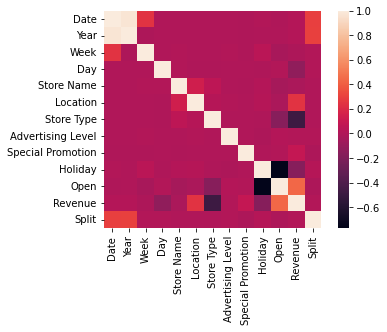

In [72]:
sidekick.plot_correlation(table_categorical)

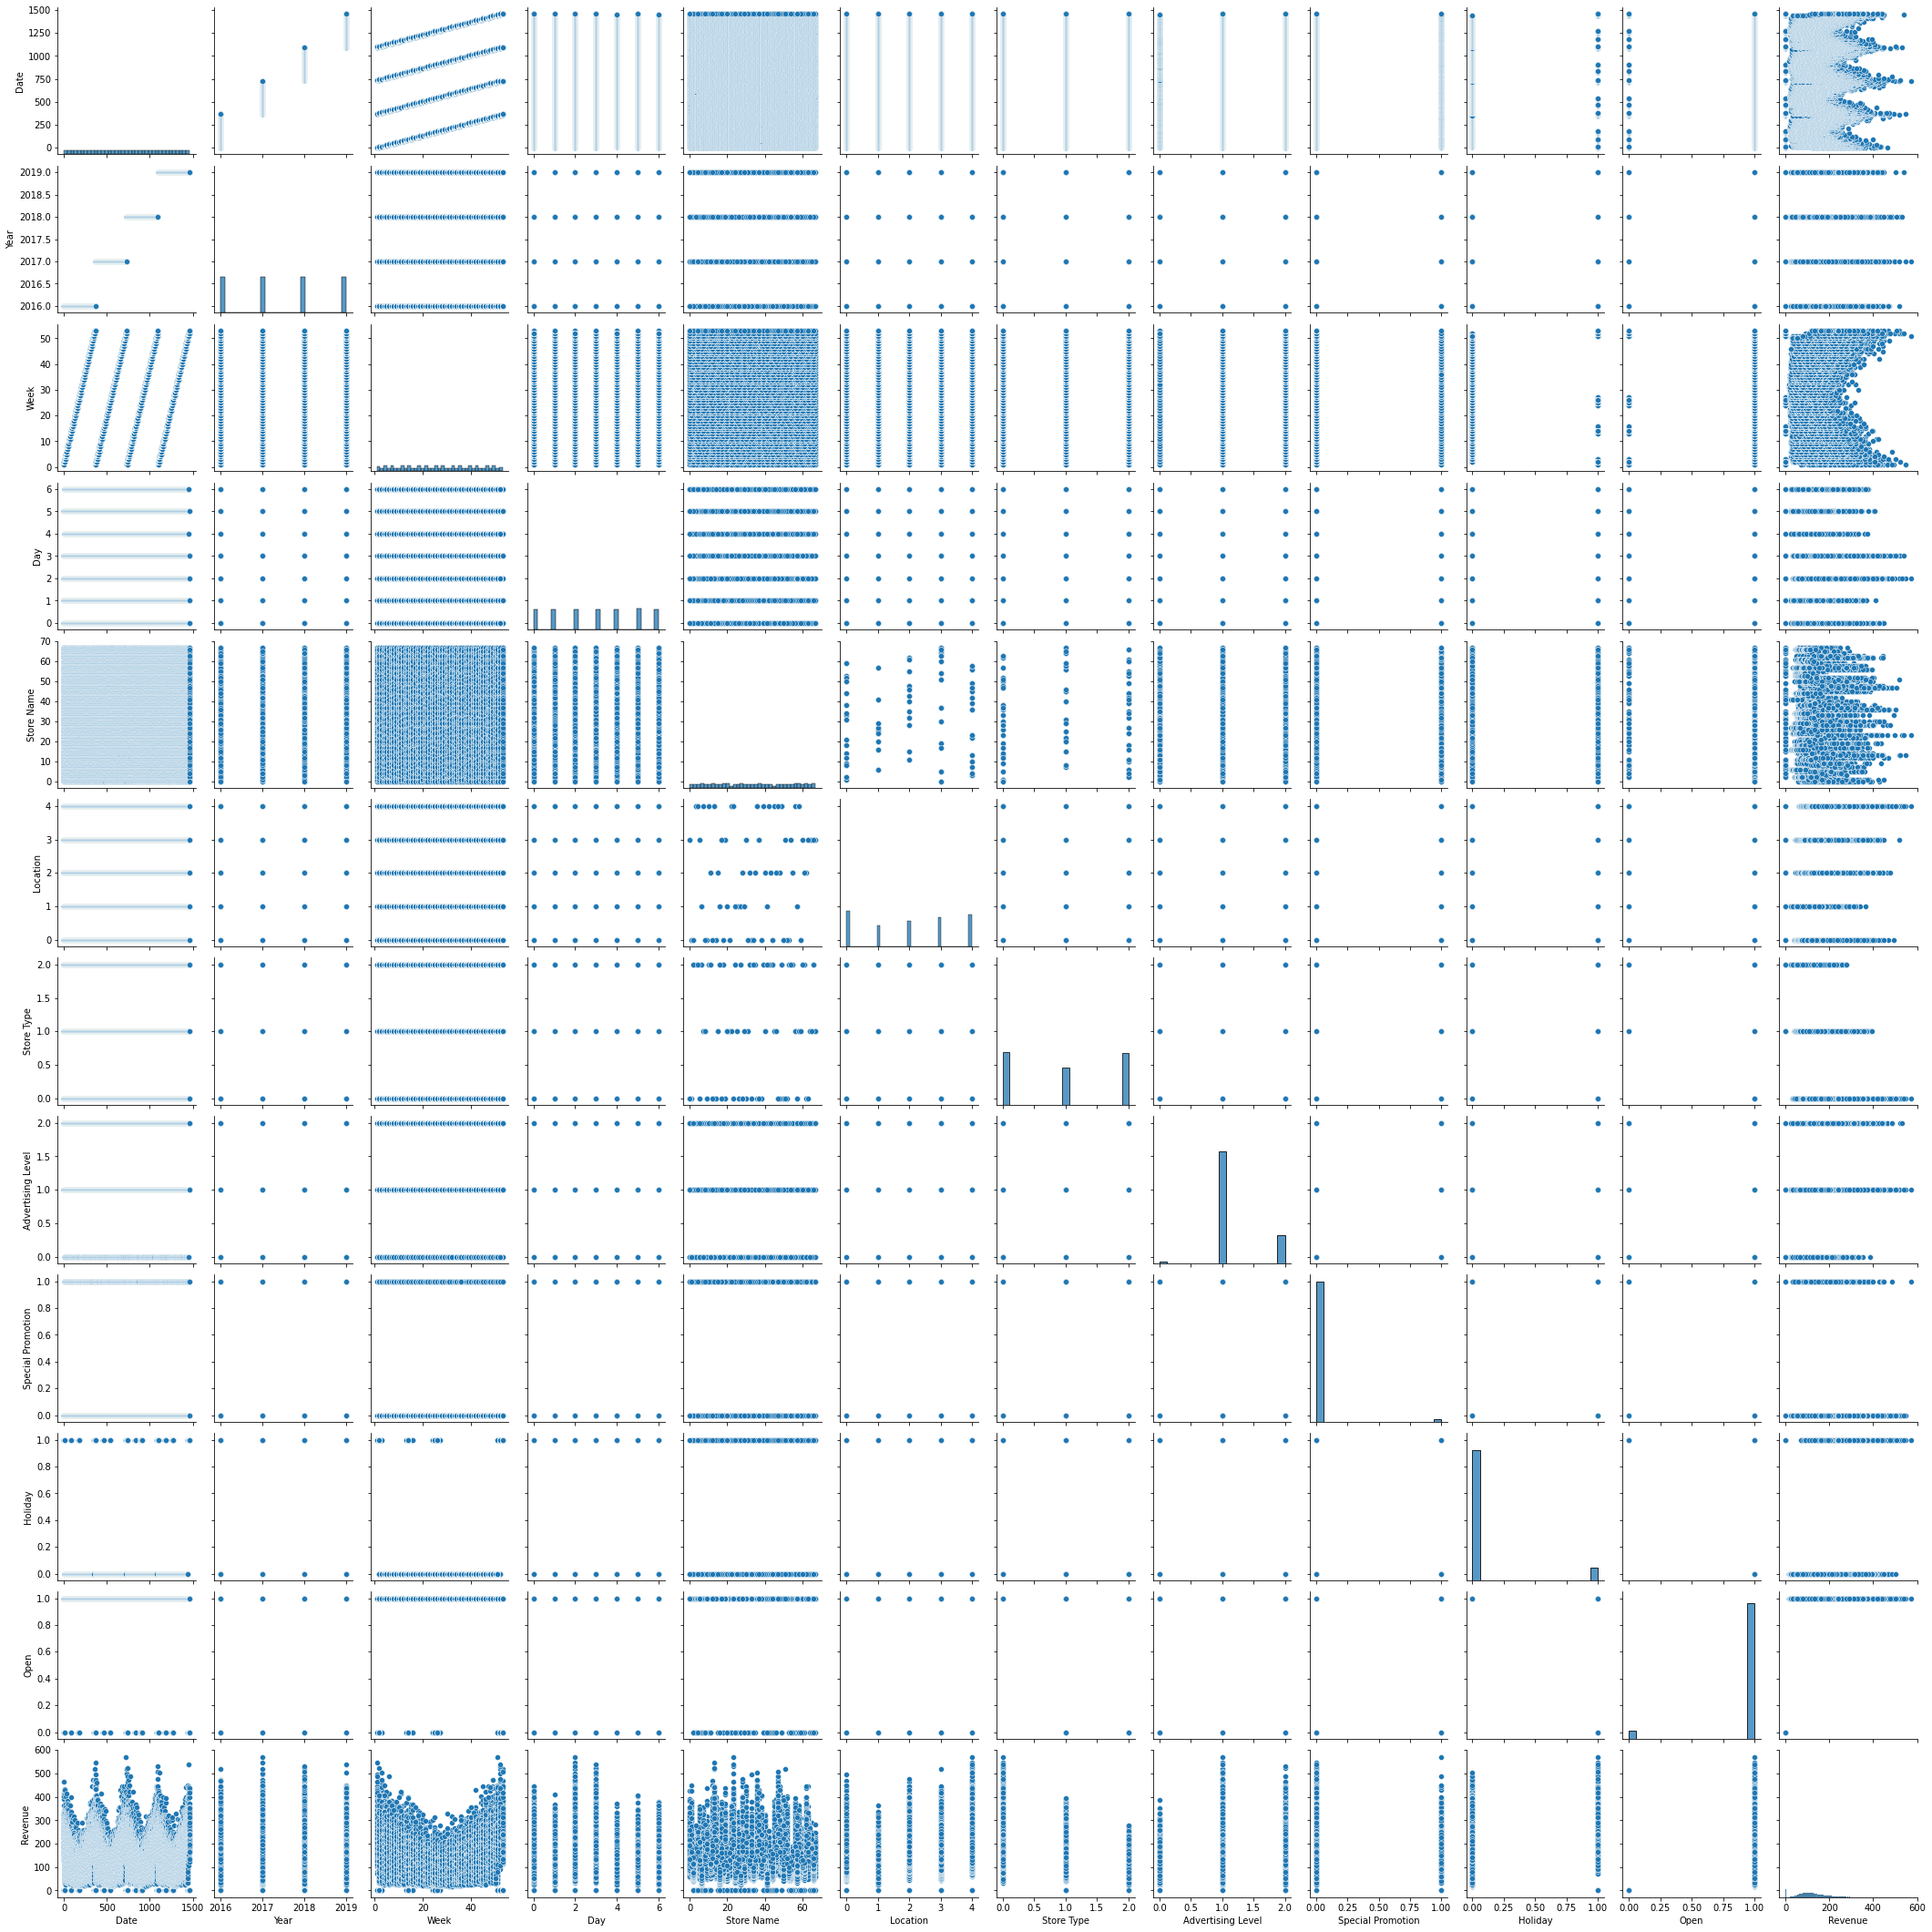

In [202]:
sidekick.plot_pairs(table, table.columns)

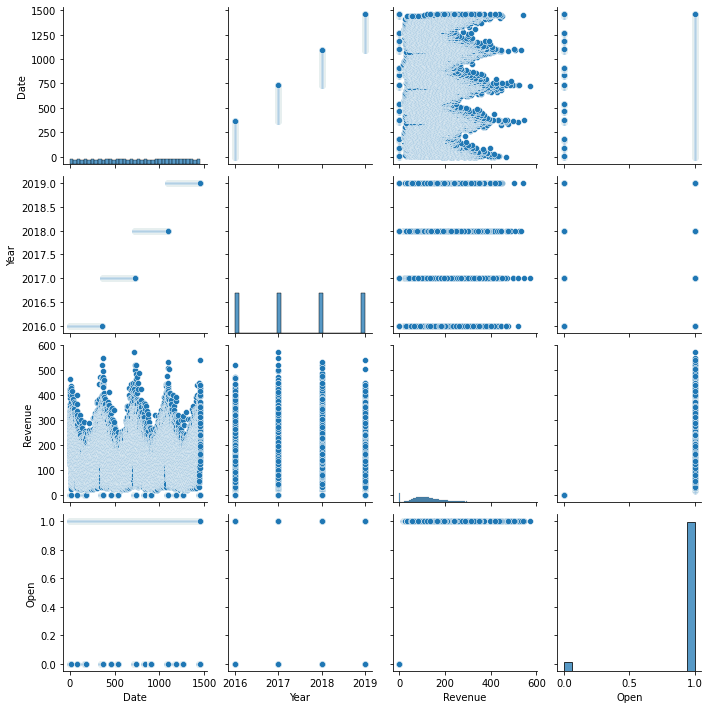

In [203]:
sidekick.plot_pairs(table, ["Date", "Year", "Revenue", "Open"], figsize=(4,9))

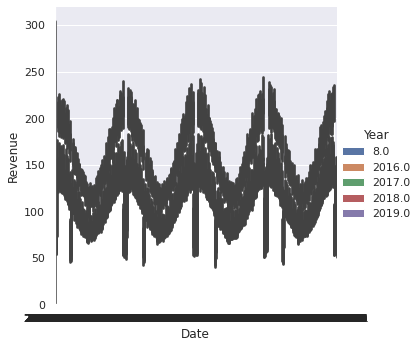

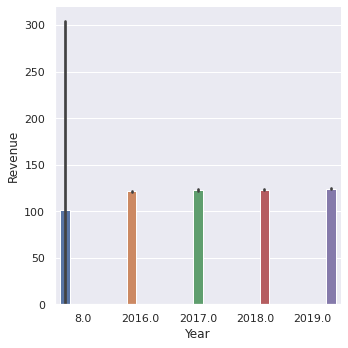

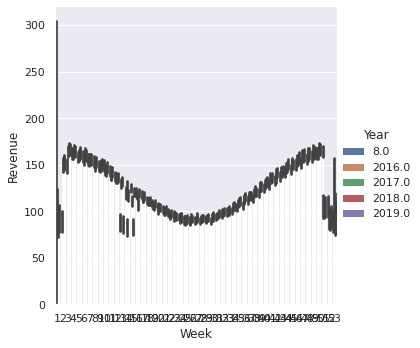

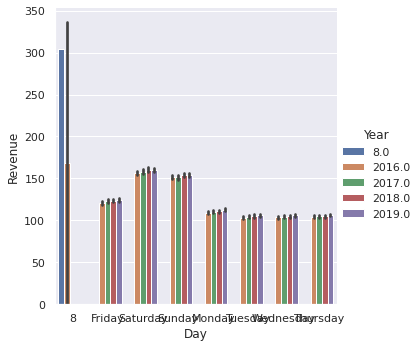

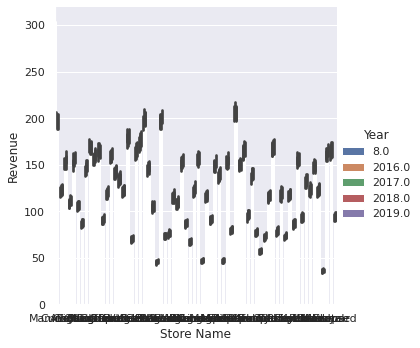

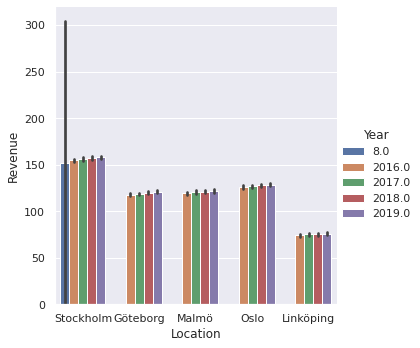

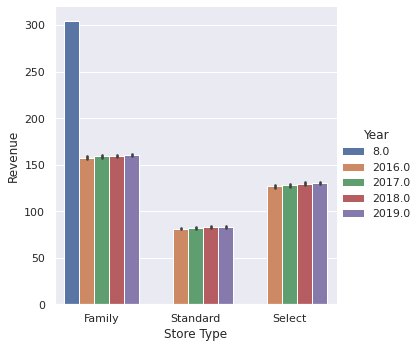

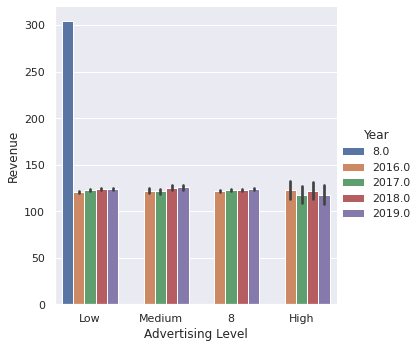

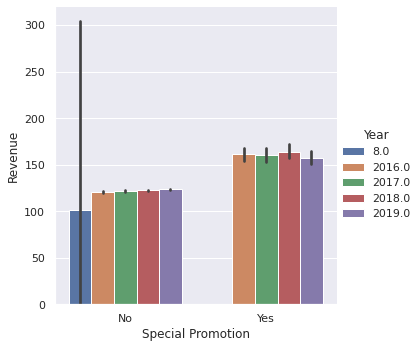

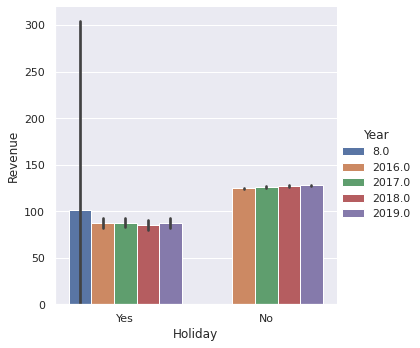

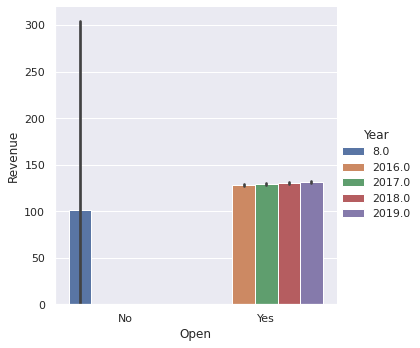

In [43]:
import seaborn as sns, numpy as np
sns.set_theme(); np.random.seed(0)

target = "Revenue"

for c in table.columns:
    if c != target:
        sns.catplot(x=c, y="Revenue", hue="Year", kind="bar", data=table)

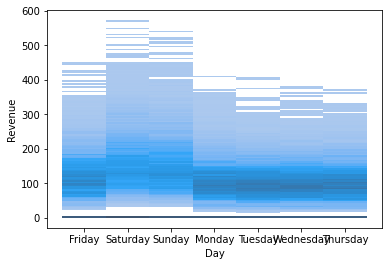

In [204]:
# sidekick.plot(table, columns="Day", target="Revenue", kind="bar")
import matplotlib.pyplot as plt
sidekick.plot_histogram(table, columns="Day", target="Revenue")

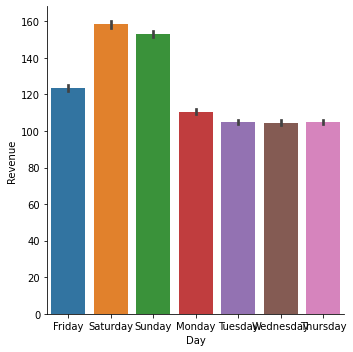

In [205]:
sns.catplot(x="Day", y="Revenue", hue=None, kind="bar", data=table)

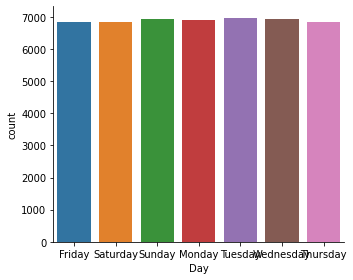

In [206]:
# TODO:
sidekick.plot_count(table, columns="Day")

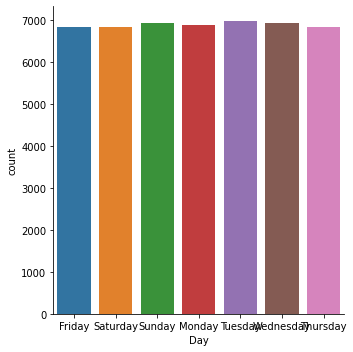

In [207]:
sns.catplot(x="Day", kind="count", data=table)

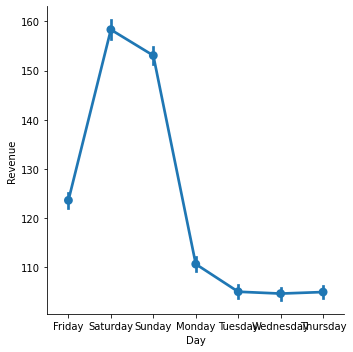

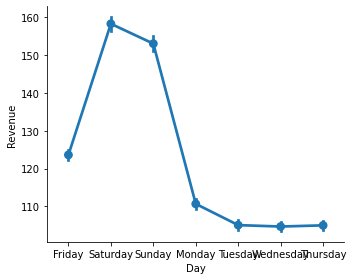

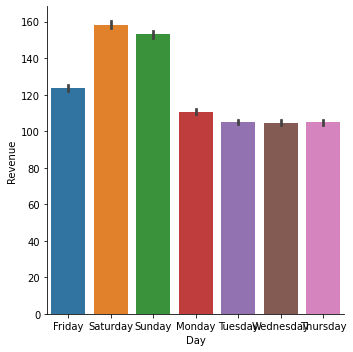

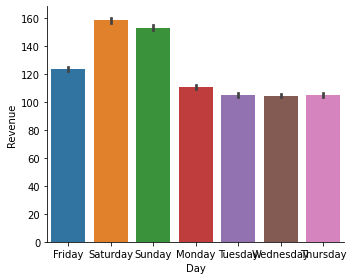

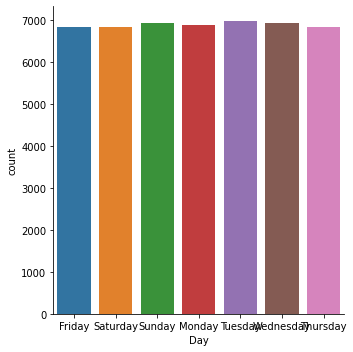

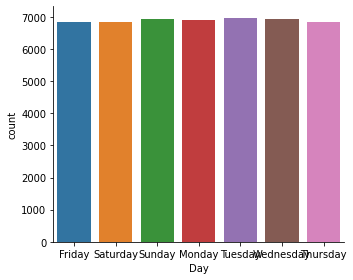

In [208]:
sns.catplot(x="Day", y="Revenue", data=table, kind="point")
sidekick.plot(table, columns="Day", target="Revenue", kind="point")

sns.catplot(x="Day", y="Revenue", data=table, kind="bar")
sidekick.plot(table, columns="Day", target="Revenue", kind="bar")

sns.catplot(x="Day", data=table, kind="count")
sidekick.plot(table, columns="Day", kind="count")

strip
swarm


/home/markussagen/.pyenv/versions/3.8.5/envs/sidekick/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 96.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/markussagen/.pyenv/versions/3.8.5/envs/sidekick/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 95.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


KeyboardInterrupt: 

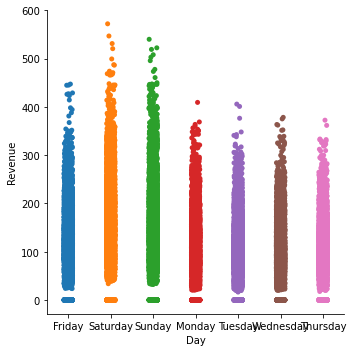

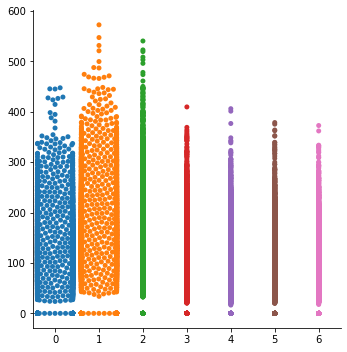

In [209]:
#sns.catplot(x="Day", y="Revenue", data=table, kind="point")
#sns.catplot(x="Day", y="Revenue", data=table, kind="bar")
#sns.catplot(x="Day", data=table, kind="count")

kinds = ["strip", "swarm", "box", "violin", "boxen", "point", "bar"]# E, "count"]

for k in kinds:
    print(k)
    sns.catplot(x="Day", y="Revenue", data=table, kind=k)


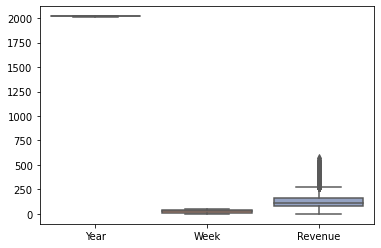

In [210]:
ax = sns.boxplot(data=table, palette="Set2")

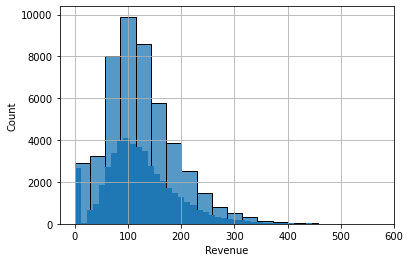

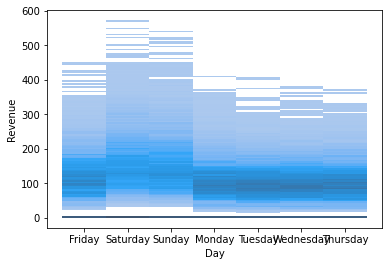

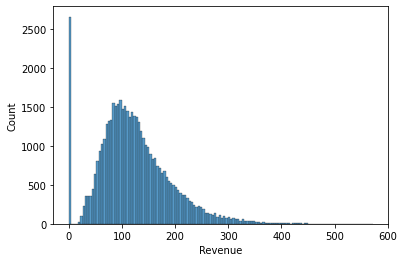

In [375]:
sns.histplot(data=table, x="Revenue", bins=20)
table["Revenue"].hist(bins=50)


#sidekick.plot(table, columns="Day", target="Revenue", kind="box")
sidekick.plot(table, columns="Day", target="Revenue", kind="hist")
sidekick.plot(table, columns="Revenue", kind="hist")

<Figure size 432x288 with 0 Axes>

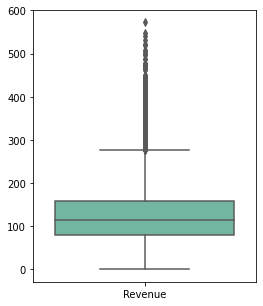

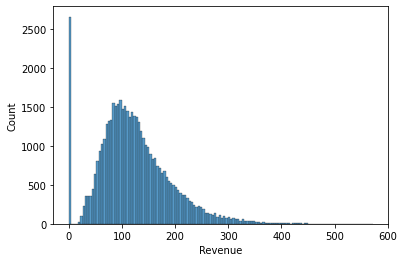

In [382]:
# https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value

sidekick.plot_outliers(table, columns="Revenue")
sidekick.plot_histogram(table, columns="Revenue")

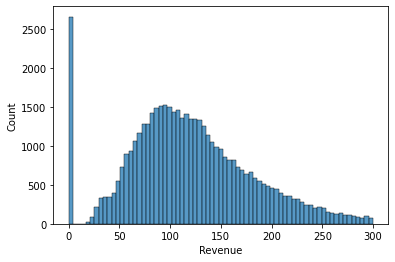

In [362]:
table_filtered = sidekick.filter_values(table, column="Revenue", conditions=">300")
sidekick.plot_histogram(table_filtered, columns="Revenue")

In [391]:
sidekick.impute_table_columns(table, columns=table.columns, target="Revenue", )

,Date,Year,Week,Day,Store Name,Location,Store Type,Advertising Level,Special Promotion,Holiday,Open,Revenue
0,2016-01-01,2016.0,1.0,Friday,Goose,Göteborg,Select,Low,No,Yes,No,0.00
1,2016-01-01,2016.0,1.0,Friday,Alligator,Göteborg,Family,Medium,No,Yes,Yes,230.06
2,2016-01-01,2016.0,1.0,Friday,Shark,Malmö,Standard,Medium,No,Yes,No,0.00
3,2016-01-01,2016.0,1.0,Friday,Giraffe,Oslo,Family,Low,No,Yes,Yes,204.10
4,2016-01-01,2016.0,1.0,Friday,Crocodile,Göteborg,Family,Low,No,Yes,Yes,233.50
...,...,...,...,...,...,...,...,...,...,...,...,...
48195,2019-12-31,2019.0,53.0,Tuesday,Snail,Linköping,Family,Low,No,Yes,Yes,240.46
48196,2019-12-31,2019.0,53.0,Tuesday,Wallaby,Oslo,Family,Low,No,Yes,Yes,163.43
48197,2019-12-31,2019.0,53.0,Tuesday,Moose,Stockholm,Standard,Medium,No,Yes,No,0.00
48198,2019-12-31,2019.0,53.0,Tuesday,Narwhal,Linköping,Standard,Low,No,Yes,No,0.00


In [389]:
is_object_dtype(table["Revenue"])

False

In [387]:
is_object_dtype(table["Day"])

True

In [388]:
is_object_dtype(table["Year"])

False

In [ ]:
## Filter values based on value or condition

In [344]:
# sidekick
table_copy = sidekick.filter_values(table, column="Revenue", conditions=["<5"])
table_copy = sidekick.filter_values(table_copy, column="Day", values=["Friday", "Saturday", "Sunday"])
table_copy

,Date,Year,Week,Day,Store Name,Location,Store Type,Advertising Level,Special Promotion,Holiday,Open,Revenue
86,2016-01-04,2016.0,2,Monday,Eel,Göteborg,Family,Low,No,Yes,Yes,291.82
89,2016-01-04,2016.0,2,Monday,Penguin,Malmö,Family,Low,No,Yes,Yes,363.77
90,2016-01-04,2016.0,2,Monday,Giraffe,Oslo,Family,Low,No,Yes,Yes,158.84
92,2016-01-04,2016.0,2,Monday,Lark,Oslo,Family,Medium,No,Yes,Yes,165.25
93,2016-01-04,2016.0,2,Monday,Crocodile,Göteborg,Family,Medium,No,Yes,Yes,254.41
...,...,...,...,...,...,...,...,...,...,...,...,...
48186,2019-12-31,2019.0,53,Tuesday,Peltarion,Stockholm,Family,Low,No,Yes,Yes,242.14
48187,2019-12-31,2019.0,53,Tuesday,Albatross,Oslo,Family,Low,No,Yes,Yes,134.05
48195,2019-12-31,2019.0,53,Tuesday,Snail,Linköping,Family,Low,No,Yes,Yes,240.46
48196,2019-12-31,2019.0,53,Tuesday,Wallaby,Oslo,Family,Low,No,Yes,Yes,163.43


In [ ]:
# Or pandas
conds = (
    ((table["Day"] !="Friday") & 
     (table["Revenue"] > 10) & 
     (table["Advertising Level"] != "Low")
    ) &
    ((table["Day"] !="Monday") & 
     (table["Store Type"] != "Standard"))
)

table[conds]

In [386]:
callable(table["Day"].mode)

True

In [100]:
df

,col1,col2
0,3,8
1,14,21
2,-2,1
3,28,34


In [98]:

df = pd.DataFrame(data={'col1': [3, 14, -2, 28], 'col2': [8, 21, 1, 34]})
df

,col1,col2
0,3,8
1,14,21
2,-2,1
3,28,34


In [101]:
display(sidekick.select_values(df, column=df.columns[0], values=[3]))
display(sidekick.filter_values(df, column=df.columns[0], values=[3]))

,col1,col2
0,3,8


,col1,col2
0,14,21
1,-2,1
2,28,34


In [243]:
display(sidekick.filter_values(df, column=df.columns[0], values=[3], conditions=[">4"]))

,col1,col2
0,-2,1


In [244]:
display(sidekick.select_values(df, column=df.columns[0], conditions=["<4"]))
display(sidekick.select_values(df, column=df.columns[0], conditions=[">4"]))

,col1,col2
0,3,8
1,-2,1


,col1,col2
0,14,21
1,28,34


In [245]:
display(sidekick.select_values(df, column=df.columns[0], values=[3], conditions=[">4"]))

,col1,col2
0,3,8
1,14,21
2,28,34


In [246]:
display(sidekick.filter_values(df, column=df.columns[0], conditions=["<2"]))
display(sidekick.filter_values(df, column=df.columns[0], values=[3]))
display(sidekick.filter_values(df, column=df.columns[0], values=[3], conditions=["<2"]))

,col1,col2
0,3,8
1,14,21
2,28,34


,col1,col2
1,14,21
2,-2,1
3,28,34


,col1,col2
0,14,21
1,28,34


In [240]:
display(sidekick.filter_values(df, column=df.columns[0]))

,col1,col2
0,3,8
1,14,21
2,-2,1
3,28,34


In [103]:
dataset

,col1,col2
1,14,21
1,14,21


In [106]:
dataset = pd.concat([v, v, pd.DataFrame({})], ignore_index=False)
dataset

,col1,col2
1,14,21
1,14,21


In [110]:
pd.concat([v, v, dataset, pd.DataFrame({})], ignore_index=True)

,col1,col2
0,14,21
1,14,21
2,14,21
3,14,21


# Split
Needs to drop NaN first

In [90]:
train, test = sidekick.split(table, shuffle=True, stratify=table["Day"])
test, valid = sidekick.split(test, test_size=0.5)

In [91]:
sidekick.add_split(table, dataset=train, split="Train")
sidekick.add_split(table, dataset=test,  split="Test")
sidekick.add_split(table, dataset=valid, split="Valid")

,Date,Year,Week,Day,Store Name,Location,Store Type,Advertising Level,Special Promotion,Holiday,Open,Revenue,Split
0,2016-01-01,2016.0,1,Friday,Goose,Göteborg,Select,Low,No,Yes,No,0.00,Train
1,2016-01-01,2016.0,1,Friday,Alligator,Göteborg,Family,Medium,No,Yes,Yes,230.06,Train
2,2016-01-01,2016.0,1,Friday,Shark,Malmö,Standard,Medium,No,Yes,No,0.00,Train
3,2016-01-01,2016.0,1,Friday,Giraffe,Oslo,Family,Low,No,Yes,Yes,204.10,Test
4,2016-01-01,2016.0,1,Friday,Crocodile,Göteborg,Family,Low,No,Yes,Yes,233.50,Test
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48195,2019-12-31,2019.0,53,Tuesday,Snail,Linköping,Family,Low,No,Yes,Yes,240.46,Train
48196,2019-12-31,2019.0,53,Tuesday,Wallaby,Oslo,Family,Low,No,Yes,Yes,163.43,Train
48197,2019-12-31,2019.0,53,Tuesday,Moose,Stockholm,Standard,Medium,No,Yes,No,0.00,Test
48198,2019-12-31,2019.0,53,Tuesday,Narwhal,Linköping,Standard,Low,No,Yes,No,0.00,Train


In [94]:
table.head()

,Date,Year,Week,Day,Store Name,Location,Store Type,Advertising Level,Special Promotion,Holiday,Open,Revenue,Split
0,2016-01-01,2016.0,1,Friday,Goose,Göteborg,Select,Low,No,Yes,No,0.00,Train
1,2016-01-01,2016.0,1,Friday,Alligator,Göteborg,Family,Medium,No,Yes,Yes,230.06,Train
2,2016-01-01,2016.0,1,Friday,Shark,Malmö,Standard,Medium,No,Yes,No,0.00,Train
3,2016-01-01,2016.0,1,Friday,Giraffe,Oslo,Family,Low,No,Yes,Yes,204.10,Test
4,2016-01-01,2016.0,1,Friday,Crocodile,Göteborg,Family,Low,No,Yes,Yes,233.50,Test


In [95]:
table["Split"]

0        Train
1        Train
2        Train
3         Test
4         Test
         ...  
48195    Train
48196    Train
48197     Test
48198    Train
48199    Train
Name: Split, Length: 48200, dtype: object

In [85]:
table

,Date,Year,Week,Day,Store Name,Location,Store Type,Advertising Level,Special Promotion,Holiday,Open,Revenue
0,2016-01-01,2016.0,1,Friday,Goose,Göteborg,Select,Low,No,Yes,No,0.00
1,2016-01-01,2016.0,1,Friday,Alligator,Göteborg,Family,Medium,No,Yes,Yes,230.06
2,2016-01-01,2016.0,1,Friday,Shark,Malmö,Standard,Medium,No,Yes,No,0.00
3,2016-01-01,2016.0,1,Friday,Giraffe,Oslo,Family,Low,No,Yes,Yes,204.10
4,2016-01-01,2016.0,1,Friday,Crocodile,Göteborg,Family,Low,No,Yes,Yes,233.50
...,...,...,...,...,...,...,...,...,...,...,...,...
48195,2019-12-31,2019.0,53,Tuesday,Snail,Linköping,Family,Low,No,Yes,Yes,240.46
48196,2019-12-31,2019.0,53,Tuesday,Wallaby,Oslo,Family,Low,No,Yes,Yes,163.43
48197,2019-12-31,2019.0,53,Tuesday,Moose,Stockholm,Standard,Medium,No,Yes,No,0.00
48198,2019-12-31,2019.0,53,Tuesday,Narwhal,Linköping,Standard,Low,No,Yes,No,0.00


In [96]:
train

,Date,Year,Week,Day,Store Name,Location,Store Type,Advertising Level,Special Promotion,Holiday,Open,Revenue,Split
236,2016-01-08,2016.0,2,Friday,Wolverine,Oslo,Select,Low,No,Yes,No,0.00,NaN
22652,2017-11-19,2017.0,47,Sunday,Gazelle,Oslo,Family,Medium,No,No,Yes,288.61,NaN
43724,2019-08-17,2019.0,33,Saturday,Boar,Oslo,Family,Low,No,No,Yes,153.51,NaN
13537,2017-02-15,2017.0,7,Wednesday,Fox,Linköping,Standard,Low,No,No,Yes,50.18,NaN
30598,2018-07-18,2018.0,29,Wednesday,Magpie,Malmö,Standard,Low,No,No,Yes,55.19,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46735,2019-11-17,2019.0,47,Sunday,Bobcat,Linköping,Standard,Low,No,No,Yes,86.20,NaN
19573,2017-08-16,2017.0,33,Wednesday,Ferret,Malmö,Select,Medium,No,No,Yes,93.36,NaN
22848,2017-11-25,2017.0,47,Saturday,Dingo,Malmö,Standard,Low,No,No,Yes,152.07,NaN
27522,2018-04-15,2018.0,16,Sunday,Tapir,Göteborg,Select,Low,No,Yes,No,0.00,NaN


In [97]:
test

,Date,Year,Week,Day,Store Name,Location,Store Type,Advertising Level,Special Promotion,Holiday,Open,Revenue,Split
13253,2017-02-07,2017.0,6,Tuesday,Sloth,Stockholm,Select,Low,No,No,Yes,175.06,Test
18235,2017-07-07,2017.0,27,Friday,Ibis,Linköping,Select,Low,No,No,Yes,69.40,Test
36253,2019-01-04,2019.0,1,Friday,Viper,Malmö,Standard,Low,No,Yes,No,0.00,Test
39818,2019-04-23,2019.0,17,Tuesday,Mammoth,Stockholm,Family,Low,No,No,Yes,132.10,Test
45497,2019-10-10,2019.0,41,Thursday,Eel,Göteborg,Family,Low,No,No,Yes,160.26,Test
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,2016-03-10,2016.0,11,Thursday,Dinosaur,Göteborg,Family,Low,No,No,Yes,94.32,Test
24574,2018-01-16,2018.0,3,Tuesday,Bee,Stockholm,Standard,Low,No,No,Yes,130.94,Test
46167,2019-10-30,2019.0,44,Wednesday,Tapir,Göteborg,Select,Low,No,No,Yes,138.46,Test
34109,2018-11-01,2018.0,44,Thursday,Buffalo,Stockholm,Select,Low,No,No,Yes,163.59,Test
